In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import cv2
from scipy.spatial.transform import Rotation as Rot
import json
from simarUtils import *
import torchvision

## Custom Hand Data

In [2]:
data = h5py.File("/coc/flash7/datasets/egoplay/one_bowl_one_object/plushiesMimicplay_with_type_label.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_100', 'demo_101', 'demo_102', 'demo_103', 'demo_104', 'demo_105', 'demo_106', 'demo_107', 'demo_108', 'demo_109', 'demo_11', 'demo_110', 'demo_111', 'demo_112', 'demo_113', 'demo_114', 'demo_115', 'demo_116', 'demo_117', 'demo_118', 'demo_119', 'demo_12', 'demo_120', 'demo_121', 'demo_122', 'demo_123', 'demo_124', 'demo_125', 'demo_126', 'demo_127', 'demo_128', 'demo_129', 'demo_13', 'demo_130', 'demo_131', 'demo_132', 'demo_133', 'demo_134', 'demo_135', 'demo_136', 'demo_137', 'demo_138', 'demo_139', 'demo_14', 'demo_140', 'demo_141', 'demo_142', 'demo_143', 'demo_144', 'demo_145', 'demo_146', 'demo_147', 'demo_148', 'demo_149', 'demo_15', 'demo_150', 'demo_151', 'demo_152', 'demo_153', 'demo_154', 'demo_155', 'demo_156', 'demo_157', 'demo_158', 'demo_159', 'demo_16', 'demo_160', 'demo_161', 'demo_162', 'demo_163', 'demo_164', 'demo_165', 'demo_166', 'demo_167', 

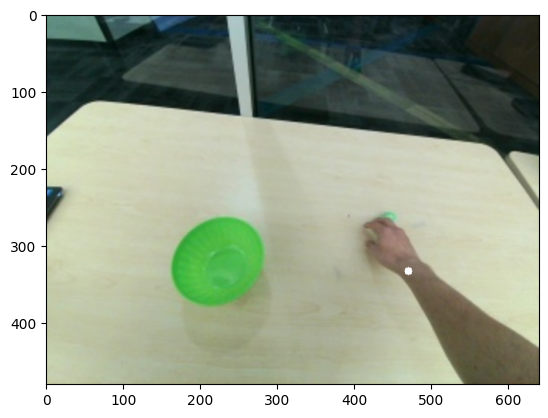

In [18]:
T = 30
px = cam_frame_to_cam_pixels(data["data/demo_10/obs/ee_pose"][[T]], WIDE_LENS_HAND_LEFT_K)
img = data["data/demo_10/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)

In [20]:
data["data/demo_10/obs/ee_pose"][[T]].round(2)

array([[-0.15, -0.09, -0.27]])

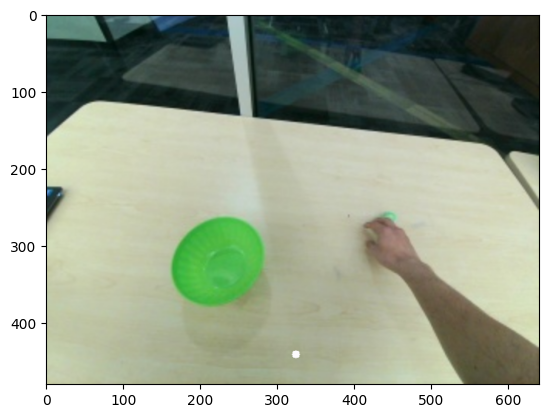

In [32]:
T = 30
ee_pose = np.array([[-0.0, -0.2, -0.27]])
px = cam_frame_to_cam_pixels(ee_pose, WIDE_LENS_HAND_LEFT_K)
img = data["data/demo_10/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)

In [ ]:
+x = left
+y = up
+z = backward

## Aria Hand Data

In [2]:
data = h5py.File("/coc/flash7/datasets/egoplay/DebugCoordsMay21/converted/debug_coords_may21Mimicplay.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_2', 'demo_3']>
	demo_0: dict with keys:  <KeysViewHDF5 ['actions', 'obs']>
		actions: (300, 30)
		obs: dict with keys:  <KeysViewHDF5 ['ee_pose', 'front_img_1']>
			ee_pose: (300, 3)
			front_img_1: (300, 480, 640, 3)
	demo_1: dict with keys:  <KeysViewHDF5 ['actions', 'obs']>
		actions: (300, 30)
		obs: dict with keys:  <KeysViewHDF5 ['ee_pose', 'front_img_1']>
			ee_pose: (300, 3)
			front_img_1: (300, 480, 640, 3)
	demo_2: dict with keys:  <KeysViewHDF5 ['actions', 'obs']>
		actions: (300, 30)
		obs: dict with keys:  <KeysViewHDF5 ['ee_pose', 'front_img_1']>
			ee_pose: (300, 3)
			front_img_1: (300, 480, 640, 3)
	demo_3: dict with keys:  <KeysViewHDF5 ['actions', 'obs']>
		actions: (43, 30)
		obs: dict with keys:  <KeysViewHDF5 ['ee_pose', 'front_img_1']>
			ee_pose: (43, 3)
			front_img_1: (43, 480, 640, 3)
mask: dict with keys:  <KeysViewHDF5 ['train', 'valid']>
	train

[[-0.41 -0.09  0.31]]


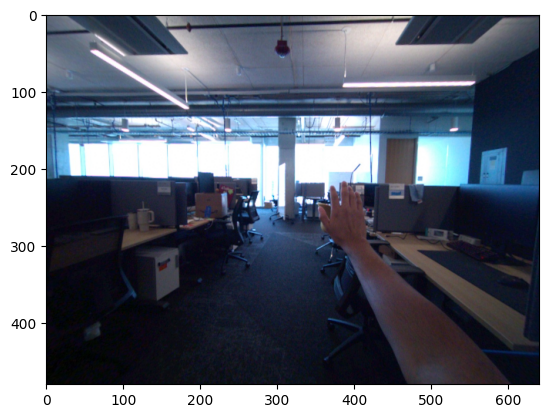

In [41]:
T = 140
demo = "demo_0"
px = cam_frame_to_cam_pixels(data[f"data/{demo}/obs/ee_pose"][[T]], WIDE_LENS_HAND_LEFT_K)
img = data[f"data/{demo}/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)
print(data[f"data/{demo}/obs/ee_pose"][[T]].round(2))

[[ 0.09 -0.08  0.37]]


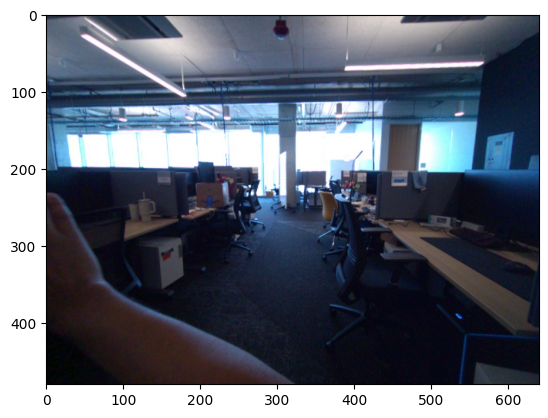

In [42]:
T = 170
px = cam_frame_to_cam_pixels(data[f"data/{demo}/obs/ee_pose"][[T]], WIDE_LENS_HAND_LEFT_K)
img = data[f"data/{demo}/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)
print(data[f"data/{demo}/obs/ee_pose"][[T]].round(2))

In [ ]:
# +x left (170, 140, demo0)
# +y up (200, 250, demo1)
# +z forward (250, 275, demo2)

## Robot Data

In [35]:
data = h5py.File("/coc/flash7/datasets/egoplay/oboov2_robot_apr16/oboov2_robot_apr16ACT.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['data', 'mask']>
data: dict with keys:  <KeysViewHDF5 ['demo_0', 'demo_1', 'demo_10', 'demo_100', 'demo_101', 'demo_102', 'demo_103', 'demo_104', 'demo_105', 'demo_106', 'demo_107', 'demo_108', 'demo_109', 'demo_11', 'demo_110', 'demo_111', 'demo_112', 'demo_113', 'demo_114', 'demo_115', 'demo_116', 'demo_117', 'demo_118', 'demo_119', 'demo_12', 'demo_120', 'demo_121', 'demo_122', 'demo_123', 'demo_124', 'demo_125', 'demo_126', 'demo_127', 'demo_128', 'demo_129', 'demo_13', 'demo_130', 'demo_131', 'demo_132', 'demo_133', 'demo_134', 'demo_135', 'demo_136', 'demo_137', 'demo_138', 'demo_139', 'demo_14', 'demo_140', 'demo_141', 'demo_142', 'demo_143', 'demo_144', 'demo_145', 'demo_146', 'demo_147', 'demo_148', 'demo_149', 'demo_15', 'demo_150', 'demo_151', 'demo_152', 'demo_153', 'demo_154', 'demo_155', 'demo_156', 'demo_157', 'demo_158', 'demo_159', 'demo_16', 'demo_160', 'demo_161', 'demo_162', 'demo_163', 'demo_164', 'demo_165', 'demo_166', 'demo_167', 

[[0.28 0.17 0.43]]


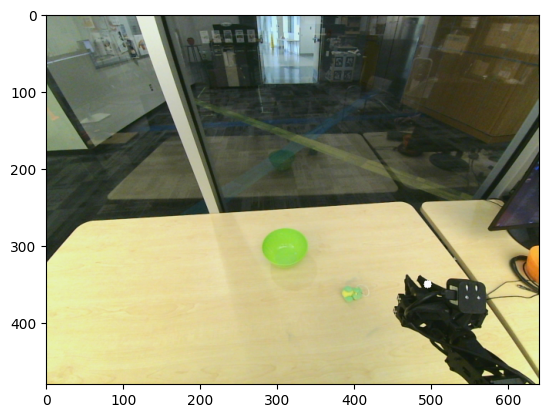

In [39]:
T = 30
px = cam_frame_to_cam_pixels(data["data/demo_10/obs/ee_pose"][[T]], WIDE_LENS_HAND_LEFT_K)
img = data["data/demo_10/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)
print(data["data/demo_10/obs/ee_pose"][[T]].round(2))

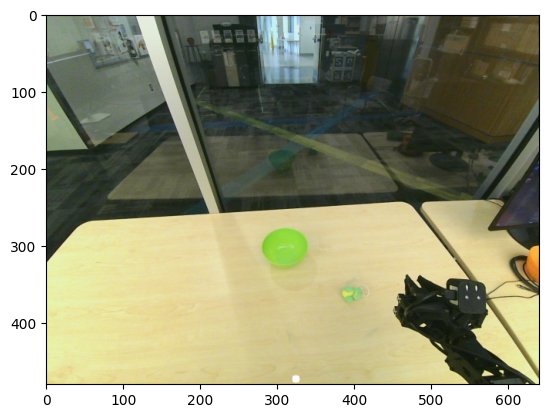

In [42]:
ee_pose = np.array([[0.0, 0.37, 0.43]])
px = cam_frame_to_cam_pixels(ee_pose, WIDE_LENS_HAND_LEFT_K)
img = data["data/demo_10/obs/front_img_1"][T]
img = draw_dot_on_frame(img, px, show=False)
plt.imshow(img)

In [ ]:
+x right
+y down
+z forward

## Aloha Data

In [4]:
data = h5py.File("/coc/flash7/datasets/egoplay/hand_data_robo_cam_may_20/episode_0.hdf5", "r")
nds(data)

dict with keys:  <KeysViewHDF5 ['action', 'observations']>
action: (5000, 14)
observations: dict with keys:  <KeysViewHDF5 ['effort', 'images', 'qpos', 'qvel']>
	effort: (5000, 14)
	images: dict with keys:  <KeysViewHDF5 ['cam_high', 'cam_right_wrist']>
		cam_high: (5000, 480, 640, 3)
		cam_right_wrist: (5000, 480, 640, 3)
	qpos: (5000, 14)
	qvel: (5000, 14)


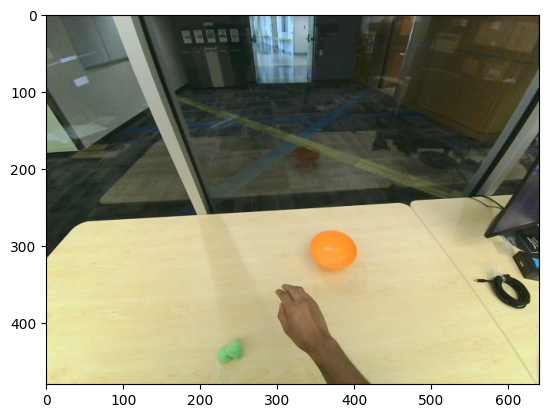

In [6]:
plt.imshow(data["observations/images/cam_high"][1000])